# Capstone Project Problem Statement: Forecasting Power Consumption in Tetuan City Using Environmental and Solar Radiation Indicators

## Business Context:
Energy consumption is a critical concern for modern organizations aiming to reduce operational costs, optimize energy usage, and support environmental sustainability. With advancements in sensor technologies and IoT, real-time data on environmental conditions (like temperature, humidity, wind speed, and solar radiation) can be collected alongside energy usage statistics. Leveraging this data enables organizations to uncover patterns, forecast energy demands, and implement smart energy-saving strategies across various zones of a facility or campus.

This project analyzes multivariate environmental and energy data to uncover insights and build predictive models to aid in efficient energy management across three distinct zones. The ultimate goal is to enable data-driven decisions to reduce waste and improve energy efficiency.

# Project Description: Tetuan City Energy Consumption Analysis

This dataset contains hourly records of environmental conditions and electricity usage from Tetuan City. It includes variables such as temperature, humidity, wind speed, solar radiation (general and diffuse flows), and power consumption across three distinct zones. Using this dataset, I aim to perform exploratory data analysis to uncover patterns and relationships between weather conditions and energy usage. The project also involves building machine learning models to solve both regression and classification problems—predicting actual power consumption values and classifying usage levels as high or low. This end-to-end workflow will serve as my capstone project, showcasing how data science can be applied to optimize energy efficiency and support smart city initiatives. If time permits, the project may also include deployment of the predictive model for real-time use.

# Project Objective:

The project aims to perform a comprehensive analysis of zone-wise power consumption using weather and radiation parameters. It includes multiple tasks from data understanding to building predictive models:

a. Exploratory Data Analysis (EDA):
* Understand the distribution and relationships of variables such as Temperature, Humidity, Wind Speed, and different types of solar radiation (general   diffuse flows and diffuse flows).
* Visualize and analyze power consumption patterns in Zone 1, Zone 2, and Zone 3 over time.
* Identify outliers, missing values, trends, seasonality, and correlations between environmental conditions and power consumption.

b. Classification Task (Binary Classification):
* Objective: Classify high vs. low power consumption for a selected zone (e.g., Zone 1).
* Method:
   * Define a binary target variable: e.g., Power consumption above a certain threshold = 1 (high), else = 0 (low).
   * Use features like temperature, humidity, wind speed, and radiation data as inputs.
   * Apply classification models such as Logistic Regression, Random Forest, or XGBoost.
   * Evaluate class balance and apply resampling if necessary.

c. Regression Task (Predictive Modeling):
* Objective: Predict actual power consumption (e.g., Zone 1 Power Consumption) using the environmental variables.
* Method:
   * Use models such as Linear Regression, Decision Trees, Random Forest, or Gradient Boosting Regressors.
   * Compare models using metrics like RMSE, MAE, and R².
   * Perform feature importance analysis to determine key contributors to energy usage.

d. Model Evaluation:
* Evaluate both classification and regression models using appropriate metrics:
  * Classification: Accuracy, Precision, Recall, F1-Score, ROC-AUC.
  * Regression: R² Score, Mean Squared Error (MSE), Mean Absolute Error (MAE), RMSE.
* Use cross-validation and hyperparameter tuning (Grid Search/CV) to ensure model robustness and generalizability.

e. Model Deployment:
* If time permits, deploy the best-performing model using:
* A Flask or FastAPI web application.
* Streamlit for interactive visualization and prediction interface.
* Export model via joblib or pickle for real-time inference.
* Demonstrate how to input new environmental data and predict power consumption or classification outcome.

## Data Description
The dataset contains the following columns:

* DateTime: Timestamp of the observation (hourly).
* Temperature: Ambient temperature (°C).
* Humidity: Humidity percentage (%).
* Wind Speed: Wind speed at the time of observation (m/s).
* General Diffuse Flows: Total diffuse solar radiation measured.
* Diffuse Flows: Diffuse component of solar radiation.
* Zone 1 Power Consumption: Power usage in Zone 1 (kW).
* Zone 2 Power Consumption: Power usage in Zone 2 (kW).
* Zone 3 Power Consumption: Power usage in Zone 3 (kW).

# 1.Exploratory *Data* Analysis:

# EDA ALL STEPS:
* Load Data	                     `✅`
* Check structure	               ✅
* Summary stats                  ✅
* Missing values	               ✅
* Duplicates	                   ✅
* Univariate analysis            ✅
* Bivariate analysis	           ✅
* Correlation	                   ✅
* Outliers	                     ✅
* Feature engineering (optional) ✅

# Importing Libreries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt

#### Observation:
##### This cell imports necessary Python libraries for data manipulation (numpy, pandas) and data visualization (matplotlib, seaborn). These are      essential for handling datasets and plotting graphs during exploratory data analysis (EDA).

# Reading the Dataset


In [ ]:
df = pd.read_csv('Tetuan City power consumption.csv')

### Observation:
##### This line reads the CSV file named "Tetuan City power consumption.csv" into a pandas DataFrame named df. This is the primary dataset that will be used for analysis.

# Displaying Initial Records of the Dataset

In [ ]:
df.head(3)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373


#### Observation:
##### This cell displays the first 3 rows of the DataFrame df.

# Displaying Last 5 Records of the Dataset

In [ ]:
df.tail(5)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504
52415,12/30/2017 23:50,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820


#### Observation:
##### This cell displays the last 5 rows of the DataFrame df

# Checking the Shape of the Dataset

In [ ]:
df.shape

(52416, 9)

#### Observation:
##### This cell returns the dimensions of the DataFrame df in the form (rows, columns).

# Listing All Column Names

In [ ]:
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

#### Observation:
##### This cell displays the names of all columns in the DataFrame df.

# Displaying Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


#### Observation:
* This cell provides a summary of the DataFrame’s structure, including:
* The number of entries (rows).
* Each column name and its data type.
* The count of non-null (non-missing) values in each column.
* The memory usage of the dataset.

# Generating Descriptive Statistics

In [ ]:
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


#### Observation:
* This cell generates summary statistics for all numeric columns in the dataset. It includes:
* Count: Number of non-null entries.
* Mean: Average value.
* Standard deviation (std): Spread of data.
* Min and Max: Minimum and maximum values.
* 25%, 50%, 75%: Quartile values (useful for detecting skewness or outliers).

# Check for Missing Value

In [ ]:
df.isnull().sum()

,0
DateTime,0
Temperature,0
Humidity,0
Wind Speed,0
general diffuse flows,0
diffuse flows,0
Zone 1 Power Consumption,0
Zone 2 Power Consumption,0
Zone 3 Power Consumption,0


#### Observation:
* This cell checks for missing (null/NaN) values in each column of the DataFrame by:
* Using isnull() to create a boolean mask where True indicates missing values.
* Using sum() to count the total True values in each column.
* This is a crucial step in data cleaning, helping to:
  * Detect columns that require imputation or removal.
  * Ensure the dataset is complete before modeling or analysis.

# Checking for Duplicate Rows

In [ ]:
df.duplicated().sum()

np.int64(0)

#### Observation:
* This cell checks for duplicate records in the dataset:
  * df.duplicated() returns a Boolean Series indicating which rows are duplicates.
  * sum() counts the number of True values, i.e., the total number of duplicate rows.

# Visualizing Missing Data Using Missingno

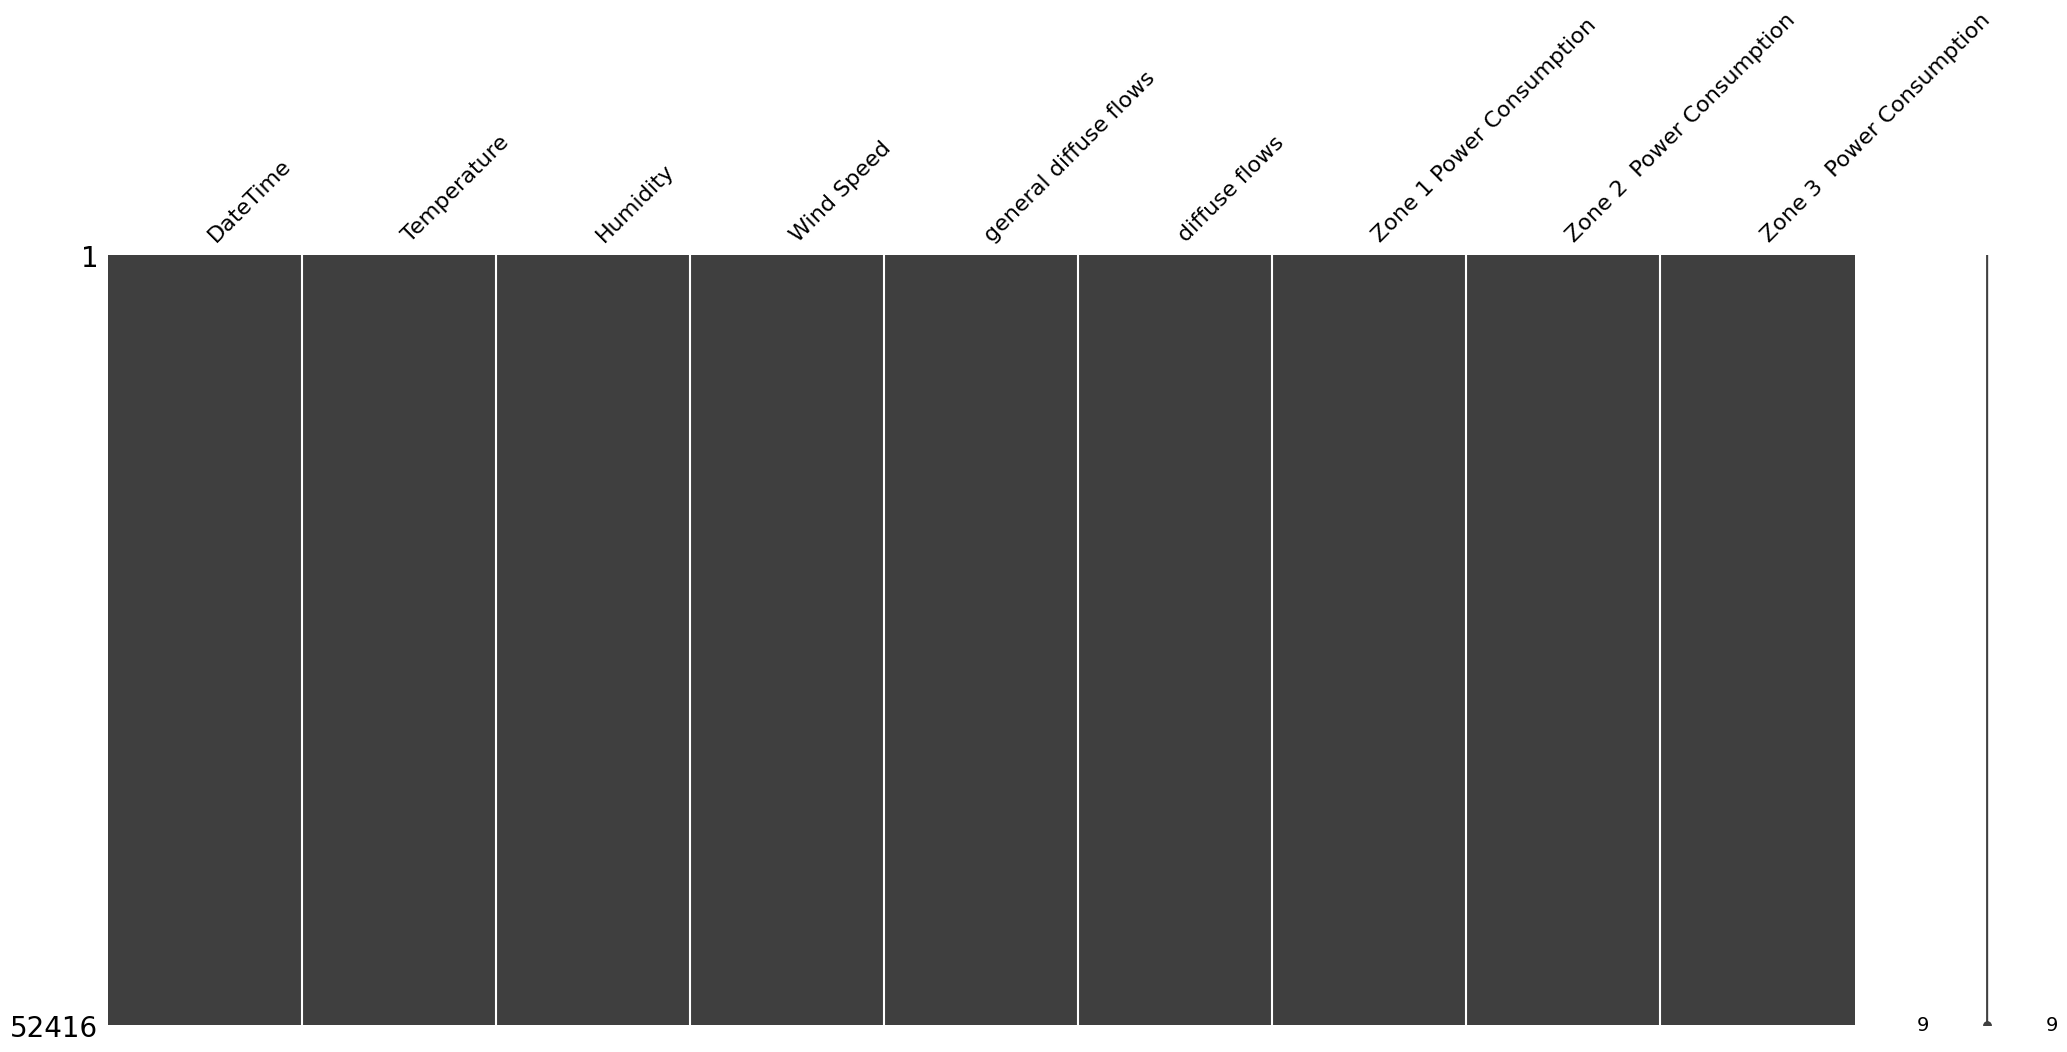

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

#### Observation:
* This cell uses the missingno library to visually inspect missing data in the DataFrame using a matrix plot:
  * Each column is shown as a vertical bar.
  * White lines (if any) indicate missing entries.
  * The plot also shows a sparkline indicating data density across rows.

* This graphical tool helps to:
  * Quickly identify patterns or blocks of missing data.
  * Detect if missing values are randomly distributed or occur in chunks.
  * Complement the numeric check from df.isnull().sum().

# Univariate Analysis:–
### Histogram and KDE Plot for Temperature

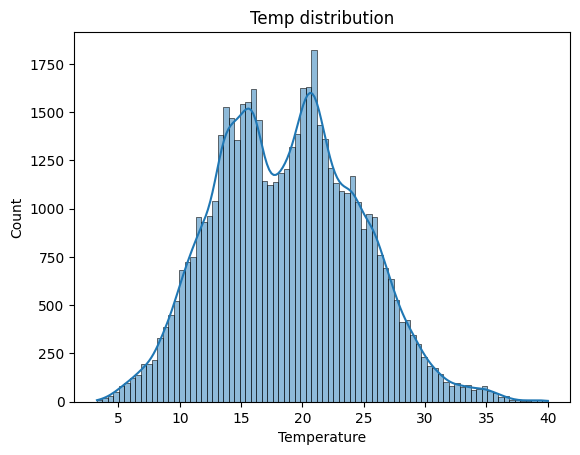

In [ ]:
sns.histplot(df['Temperature'],kde = True)
plt.title("Temp distribution")
plt.show()

#### Observation:
* This is a univariate analysis of the Temperature column using a histogram with a Kernel Density Estimate (KDE) overlay:
* The histogram shows the frequency distribution of temperature values.
* The KDE curve estimates the probability density, giving a smooth distribution shape.

# Univariate Analysis:–
### Average Power Consumption by Zone

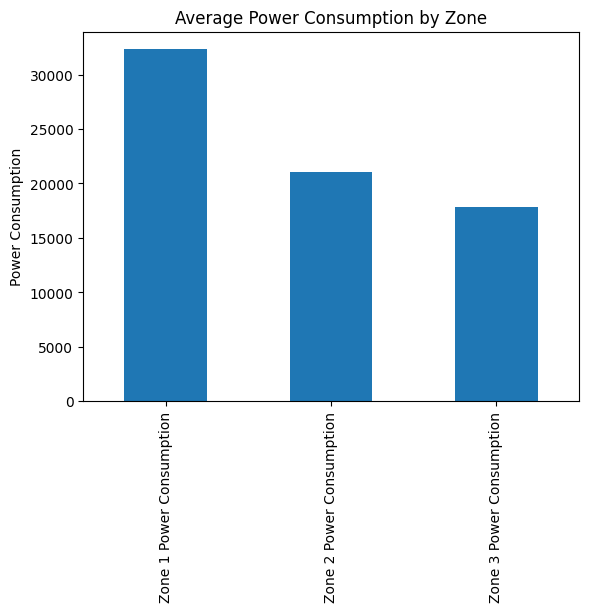

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Normalize column names: remove extra spaces
df.columns = [re.sub(' +', ' ', col.strip()) for col in df.columns]

# Plot average power consumption
df[['Zone 1 Power Consumption', 'Zone 2 Power Consumption', 'Zone 3 Power Consumption']].mean().plot(kind='bar')
plt.title("Average Power Consumption by Zone")
plt.ylabel("Power Consumption")
plt.show()

#### Observation:
* This cell performs column name cleaning using regex to remove extra spaces, ensuring reliable column access.
* It then performs univariate analysis by plotting the average power consumption for each zone (Zone 1, Zone 2, and Zone 3) using a bar chart.

# Bivariate Analysis:–
### Humidity Bins vs Zone 1 Power Consumption (Boxplot)

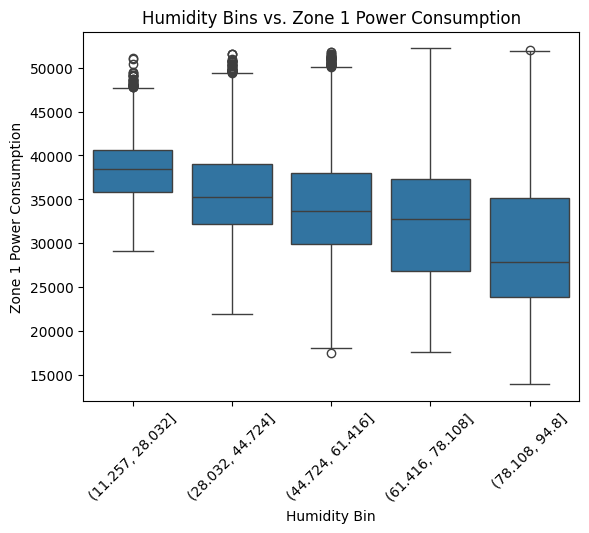

In [ ]:
df['Humidity Bin'] = pd.cut(df['Humidity'], bins=5)
sns.boxplot(x='Humidity Bin', y='Zone 1 Power Consumption', data=df)
plt.xticks(rotation=45)
plt.title('Humidity Bins vs. Zone 1 Power Consumption')
plt.show()

#### Observation:
* This cell performs a bivariate analysis between Humidity (binned) and Zone 1 Power Consumption using a boxplot.
* pd.cut() divides the humidity values into 5 equal-width bins to simplify analysis.
* The boxplot shows the distribution (median, quartiles, and outliers) of power consumption within each humidity range.

# Bivariate Analysis:–
### Temperature vs Zone 1 Power Consumption (Scatter Plot)

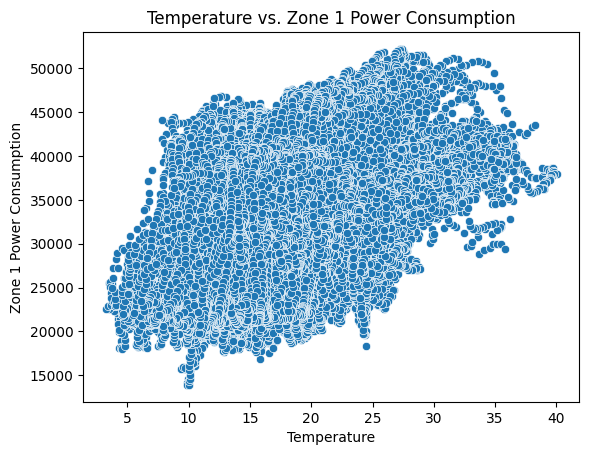

In [ ]:
sns.scatterplot(x='Temperature', y='Zone 1 Power Consumption', data=df)
plt.title('Temperature vs. Zone 1 Power Consumption')
plt.show()

#### Observation:
* This scatter plot performs a bivariate analysis between Temperature and Zone 1 Power Consumption.
* Each point represents a record in the dataset with:
  * X-axis: Temperature value
  * Y-axis: Corresponding Zone 1 power usage

# Bivariate Analysis:–
### Wind Speed vs. High/Low Zone 1 Power Consumption (Stacked Bar Chart)

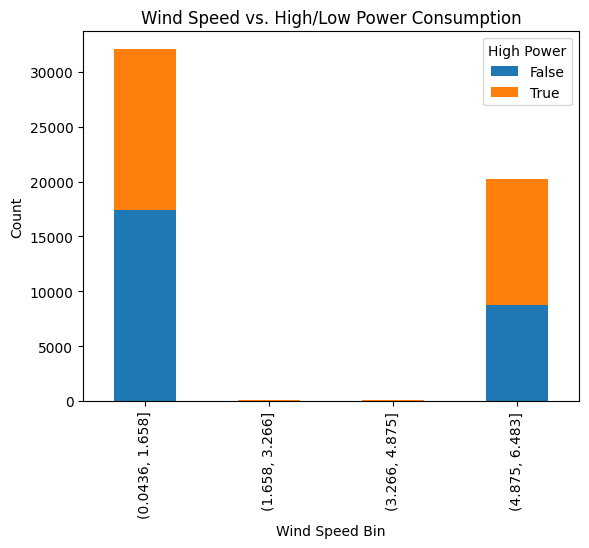

In [ ]:
df['Wind Speed Bin'] = pd.cut(df['Wind Speed'], bins=4)
df['High Power'] = df['Zone 1 Power Consumption'] > df['Zone 1 Power Consumption'].median()
pd.crosstab(df['Wind Speed Bin'], df['High Power']).plot(kind='bar', stacked=True)
plt.title('Wind Speed vs. High/Low Power Consumption')
plt.ylabel('Count')
plt.show()

#### Observation:
* This cell analyzes how Zone 1 power consumption varies with wind speed, using a stacked bar chart.
* Wind speed is binned into 4 intervals.
* Power consumption is classified as High or Low based on whether it is above the median.
* pd.crosstab() creates a contingency table, and the chart visualizes the count of high vs low consumption in each wind speed bin.

# Multivariate Analysis:–
### Correlation Matrix of Numerical Features (Heatmap)

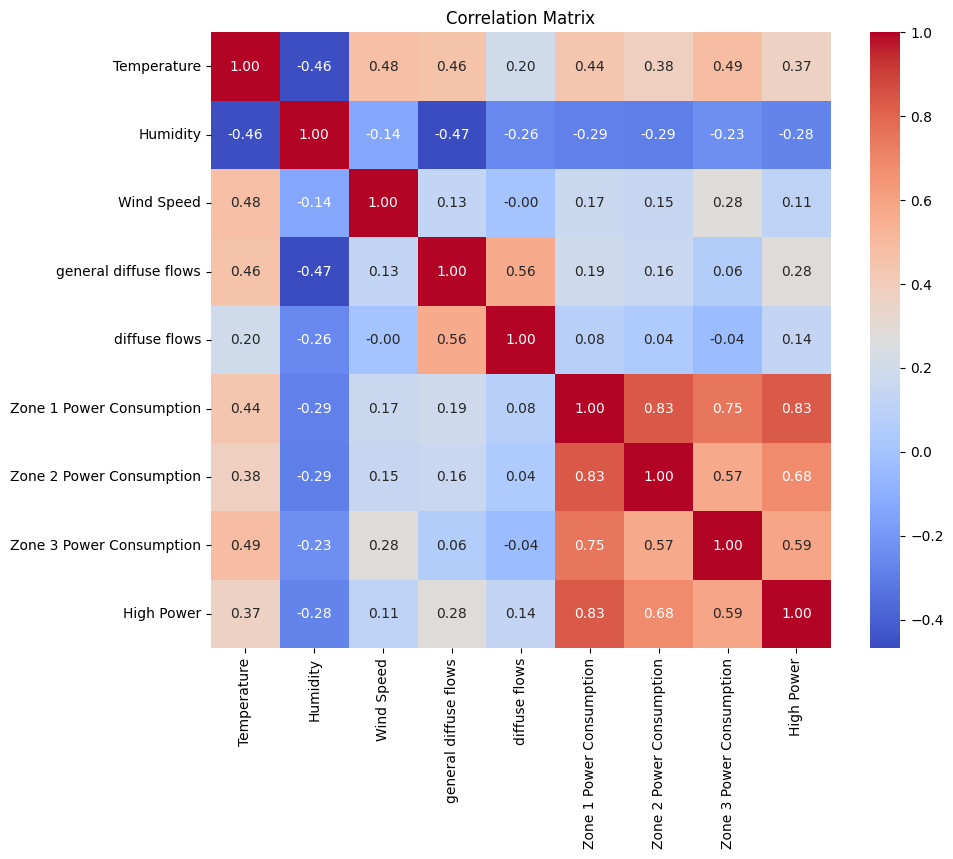

In [ ]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Observation:
* This heatmap visualizes the pairwise correlation between all numeric columns in the dataset.
* Correlation values range from -1 to 1:
   * +1: Perfect positive correlation
   * -1: Perfect negative correlation
   * 0: No correlation
* annot=True displays the exact correlation values inside the heatmap cells.
* coolwarm color palette helps easily distinguish positive (warm) and negative (cool) relationships.

# Outlier Detection Using Boxplots and the IQR Method

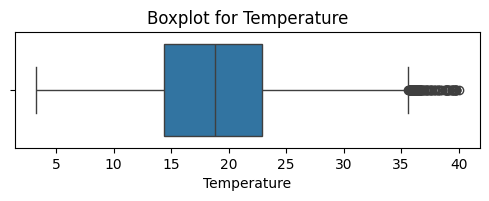

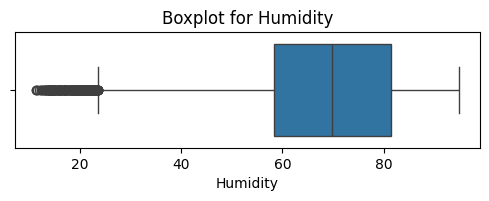

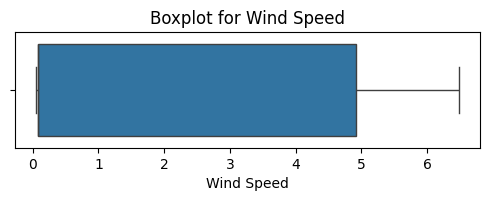

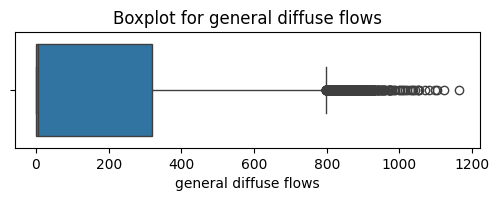

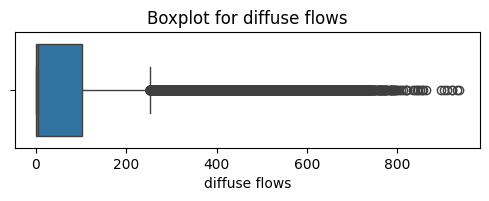

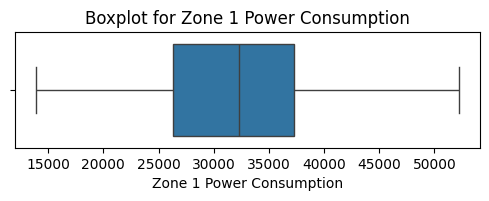

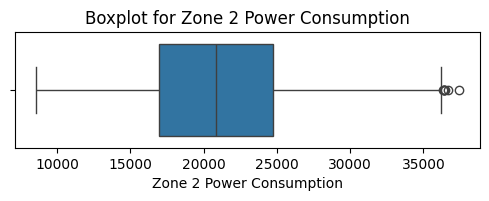

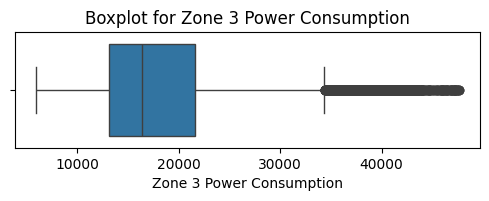

Temperature: 142 outliers
Humidity: 291 outliers
Wind Speed: 0 outliers
general diffuse flows: 2315 outliers
diffuse flows: 4571 outliers
Zone 1 Power Consumption: 0 outliers
Zone 2 Power Consumption: 7 outliers
Zone 3 Power Consumption: 1191 outliers


In [ ]:
numeric_cols = df.select_dtypes(include='number').columns

# Boxplots for each numeric column to visually inspect outliers
for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# Detect outliers using the IQR method
outlier_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

# Print number of outliers in each column
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")

#### Observation:
* Numeric Column Selection:
  * Selected only the numeric columns from the DataFrame for outlier analysis.
* Boxplot Visualization:
  * Generated boxplots for each numeric column to visually inspect the spread and detect potential outliers.
* IQR Calculation:
  * Computed the Interquartile Range (IQR) for each column using Q1 (25th percentile) and Q3 (75th percentile).
* Outlier Detection Logic:
  * Defined outliers as data points below Q1 - 1.5 × IQR or above Q3 + 1.5 × IQR.
* Outlier Counting:
  * Counted and stored the number of outliers for each numeric column in a summary dictionary.
* Output Summary:
  * Printed the number of detected outliers for every numeric column, helping to identify which features contain extreme values.

# 3- Data Cleaning & pre processing
* 0.Dropping unwanted columns
* 1.Dropping duplicate rows
* 2.Replacing wrong entries
* 3.Missing values imputation (SimpleImputer, fillna())
* 4.Handle outliers (IQR, Z-score method)
* 5.Encoding
* 6.Data splitting
* 7.Feature scaling: StandardScaler, MinMaxScaler
* 8.Feature selection:Based on correlation, domain knowledge, or model-based methods


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/Tetuan City power consumption.csv')

In [ ]:
# Make a copy of the original dataset
df_copy = df.copy()
# Select categorical variables(Object type)
cat_variables = df_copy.select_dtypes(include = 'object')
# Select numerical varialbles(int,float)
num_variables = df_copy.select_dtypes(include = ['int','float'])

# Print Results
print("Categorical Varibles:")
print(cat_variables.head())
print("\nNumerical variables:")
print(num_variables.head())

Categorical Varibles:
        DateTime
0  1/1/2017 0:00
1  1/1/2017 0:10
2  1/1/2017 0:20
3  1/1/2017 0:30
4  1/1/2017 0:40

Numerical variables:
   Temperature  Humidity  Wind Speed  general diffuse flows  diffuse flows  \
0        6.559      73.8       0.083                  0.051          0.119   
1        6.414      74.5       0.083                  0.070          0.085   
2        6.313      74.5       0.080                  0.062          0.100   
3        6.121      75.0       0.083                  0.091          0.096   
4        5.921      75.7       0.081                  0.048          0.085   

   Zone 1 Power Consumption  Zone 2  Power Consumption  \
0               34055.69620                16128.87538   
1               29814.68354                19375.07599   
2               29128.10127                19006.68693   
3               28228.86076                18361.09422   
4               27335.69620                17872.34043   

   Zone 3  Power Consumption  
0    

### 3.0 Dropping unwanted columns:
* Suppose we identify some unwanted columns (example: 'Unnamed: 0' or any irrelevant column)


In [ ]:
# print columns of dataset
print('columns in data set')
print(df_copy.columns)

# If you don't want to drop anything, keep the list empty(as it is)
unwanted_columns = []

# Check if the unwanted columns actually exist in the dataframe
columns_to_drop = [col for col in unwanted_columns if col in df_copy.columns]

columns in data set
Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')


### 3.1 Dropping duplicates Rows:

In [ ]:
# Find all duplicate rows
duplicates = df_copy[df.duplicated()]

#show number of duplicated rows
print("number of dupliate rows:",duplicates.shape[0])

# preview duplicates, if any
duplicates.head()

number of dupliate rows: 0


,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption


In [ ]:
# remove duplicates
df_cleaned = df.drop_duplicates()

# check new shape
print("New shape after removing:",df_cleaned.shape)

New shape after removing: (52416, 9)


### 3.2 Replacing wrong entries, if any  

* Missing or NaN

* Outliers or unrealistic values

* Wrong data types

* Duplicate timestamps or logic issues

* Inconsistent column formats or typos

## steps:
* 1.load data set(already done in EDA)
* 2.detect wrong entries
* 3.relace or fixed wrong entries
* 4.save the clean file


#####  3.2.1Load dataset:

In [ ]:
# import pandas as pd

# # Load the CSV file
# df = pd.read_csv("etuan City power consumption.csv")

# Show first 5 rows
# df.head(5)

##### 3.2.2 detect wrong entries:

In [ ]:
# Check for Null/Missing Values
df.isnull().sum()

,0
DateTime,0
Temperature,0
Humidity,0
Wind Speed,0
general diffuse flows,0
diffuse flows,0
Zone 1 Power Consumption,0
Zone 2 Power Consumption,0
Zone 3 Power Consumption,0


In [ ]:
# Check Data Types
df.dtypes

,0
DateTime,object
Temperature,float64
Humidity,float64
Wind Speed,float64
general diffuse flows,float64
diffuse flows,float64
Zone 1 Power Consumption,float64
Zone 2 Power Consumption,float64
Zone 3 Power Consumption,float64


#### Detect outliers:

In [ ]:
# Detect outliers:

# Describe stats to spot anomalies
# df.describe()

# Check negative values in power consumption (if not expected)
invalid_power = df[(df["Zone 1 Power Consumption"] < 0) |
                   (df["Zone 2  Power Consumption"] < 0) |
                   (df["Zone 3  Power Consumption"] < 0)]
print(invalid_power)

Empty DataFrame
Columns: [DateTime, Temperature, Humidity, Wind Speed, general diffuse flows, diffuse flows, Zone 1 Power Consumption, Zone 2  Power Consumption, Zone 3  Power Consumption]
Index: []


##### 3.2.3 Replace or fix wrong entries:

In [ ]:
# Replace Negative Values with Mean of the Column
for col in ["Zone 1 Power Consumption", "Zone 2  Power Consumption", "Zone 3  Power Consumption"]:
    mean_val = df[df[col] >= 0][col].mean()
    df[col] = df[col].apply(lambda x: mean_val if x < 0 else x)


In [ ]:
# Fill Missing Values with Forward Fill
df.fillna(method='ffill', inplace=True)


/tmp/ipython-input-29-219119571.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


##### Replace Strings or Wrong Entries
 * (Example: replace misspelled entries in a "City" column)

In [ ]:
# df["City"] = df["City"].replace({"Tetuon": "Tetuan"})

In [ ]:
# Save the Cleaned File
df.to_csv("Cleaned_Tetuan_City_power.csv", index=False)

### 3.3 Missing values imputation (SimpleImputer, fillna())
Missing data is common in real-world datasets. If not handled, it can lead to:

Errors in model training

Biased or incomplete analysis

Failures in ML algorithms (most don’t accept nulls)



In [ ]:
# Make a copy before imputing
df_original = df.copy()

In [ ]:
# Perform imputation...
from sklearn.impute import SimpleImputer
import pandas as pd

# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Create imputer: strategy = mean, median, most_frequent, or constant
imputer = SimpleImputer(strategy='mean')

# Fit and transform
df[numeric_cols.columns] = imputer.fit_transform(numeric_cols)


In [ ]:
#Then compare
print("Before:\n", df_original[numeric_cols.columns].isnull().sum())
print("After:\n", df[numeric_cols.columns].isnull().sum())


Before:
 Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64
After:
 Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64


In [ ]:
# If you want to check if any missing values remain:
print(df.isnull().sum())        # Shows number of missing values in each column

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64


### 3.4 Handle outliers (IQR method) :
* IQR = Q3 − Q1

* Q1 = 25th percentile
* Q3 = 75th percentile

* Lower bound = Q1 − 1.5 × IQR

* Upper bound = Q3 + 1.5 × IQR

In [ ]:
import pandas as pd

# Example for one column
col = 'Temperature'  # replace with your column name

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print("Outliers:\n", outliers)

# Optionally remove them:
df_cleaned = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


Outliers:
               DateTime  Temperature  Humidity  Wind Speed  \
27000   7/7/2017 12:00        35.78     27.88       4.921   
27001   7/7/2017 12:10        36.21     26.75       4.923   
27002   7/7/2017 12:20        36.37     26.71       4.922   
27003   7/7/2017 12:30        36.69     26.52       4.920   
27004   7/7/2017 12:40        36.59     31.89       4.925   
...                ...          ...       ...         ...   
31910  8/10/2017 14:20        35.81     26.81       4.907   
32056  8/11/2017 14:40        35.94     20.34       4.903   
32057  8/11/2017 14:50        35.89     20.51       4.905   
32058  8/11/2017 15:00        35.66     21.81       4.902   
32059  8/11/2017 15:10        35.64     21.94       4.905   

       general diffuse flows  diffuse flows  Zone 1 Power Consumption  \
27000                  841.0           94.4               29444.25249   
27001                  850.0           94.7               32799.46844   
27002                  855.0         

#### Z-score Method
* Z-score = (x − mean) / std

* Outliers have Z-scores > 3 or < -3



In [ ]:
import pandas as pd
from scipy.stats import zscore

# Load your dataset
df = pd.read_csv("Tetuan City power consumption.csv")

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute Z-scores
z_scores = zscore(numeric_df)

# Convert back to DataFrame with same column names
z_df = pd.DataFrame(z_scores, columns=numeric_df.columns)

# Show Z-score output
print(z_df.head())



   Temperature  Humidity  Wind Speed  general diffuse flows  diffuse flows  \
0    -2.106645  0.356277   -0.798900              -0.690797      -0.603085   
1    -2.131578  0.401291   -0.798900              -0.690725      -0.603359   
2    -2.148946  0.401291   -0.800178              -0.690755      -0.603238   
3    -2.181962  0.433443   -0.798900              -0.690646      -0.603270   
4    -2.216353  0.478456   -0.799752              -0.690808      -0.603359   

   Zone 1 Power Consumption  Zone 2  Power Consumption  \
0                  0.239917                  -0.944672   
1                 -0.354854                  -0.320573   
2                 -0.451143                  -0.391398   
3                 -0.577254                  -0.515516   
4                 -0.702514                  -0.609482   

   Zone 3  Power Consumption  
0                   0.363262  
1                   0.346669  
2                   0.276804  
3                   0.160655  
4                   0.09166

### 3.5 Encoding:
* Load the dataset
* Identify Categorical Columns
* Option A: Label Encoding (for Ordinal/Ordered data)
* Option B: One-Hot Encoding (for Nominal/Unordered data)


In [ ]:
# Show non-numeric (categorical) columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols.tolist())


Categorical Columns: ['DateTime']


##### Label Encoding (for Ordinal/Ordered data)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Apply label encoding to all categorical columns
for col in categorical_cols:
    df[col + '_label'] = le.fit_transform(df[col])

# Show result
df[[*categorical_cols, *[col + '_label' for col in categorical_cols]]].head()


,DateTime,DateTime_label
0,1/1/2017 0:00,0
1,1/1/2017 0:10,1
2,1/1/2017 0:20,2
3,1/1/2017 0:30,3
4,1/1/2017 0:40,4


#####  One-Hot Encoding (for Nominal/Unordered data)

In [ ]:
# One-hot encode categorical columns (remove first column to avoid dummy variable trap)
df_onehot = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Show result
df_onehot.head()


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,DateTime_label,DateTime_1/1/2017 0:10,...,DateTime_9/9/2017 8:20,DateTime_9/9/2017 8:30,DateTime_9/9/2017 8:40,DateTime_9/9/2017 8:50,DateTime_9/9/2017 9:00,DateTime_9/9/2017 9:10,DateTime_9/9/2017 9:20,DateTime_9/9/2017 9:30,DateTime_9/9/2017 9:40,DateTime_9/9/2017 9:50
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,False,...,False,False,False,False,False,False,False,False,False,False
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1,True,...,False,False,False,False,False,False,False,False,False,False
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2,False,...,False,False,False,False,False,False,False,False,False,False
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,3,False,...,False,False,False,False,False,False,False,False,False,False
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,4,False,...,False,False,False,False,False,False,False,False,False,False


#### 3.6 Data Splitting:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load your dataset
df = pd.read_csv("Tetuan City power consumption.csv")
# We are predicting "Zone 1 Power Consumption"
target_column = "Zone 1 Power Consumption"
# X = all columns except the target
X = df.drop(columns=[target_column])

# y = only the target column
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(
    X,         # input features
    y,         # target values
    test_size=0.2,      # 20% for test, 80% for training
    random_state=42     # ensures same split every time (reproducibility)
)

# Multiple outputs neatly
{
    "X_train": X_train.shape,
    "X_test": X_test.shape,
    "y_train": y_train.shape,
    "y_test": y_test.shape
}



{'X_train': (41932, 8),
 'X_test': (10484, 8),
 'y_train': (41932,),
 'y_test': (10484,)}

#### 3.7 Feature Scaling

In [ ]:
# If X_train is a DataFrame (not NumPy array), drop the DateTime column
X_train = X_train.drop(columns=['DateTime'], errors='ignore')
X_test = X_test.drop(columns=['DateTime'], errors='ignore')

# Now apply scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# StandardScaler
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

# MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

print("✅ Scaling done!")
print("Standard Scaled X_train shape:", X_train_standard.shape)
print("MinMax Scaled X_train shape:", X_train_minmax.shape)


✅ Scaling done!
Standard Scaled X_train shape: (41932, 7)
MinMax Scaled X_train shape: (41932, 7)


#### 3.8 Feature selection

##### 3.8.1  Based on Correlation (Filter method)


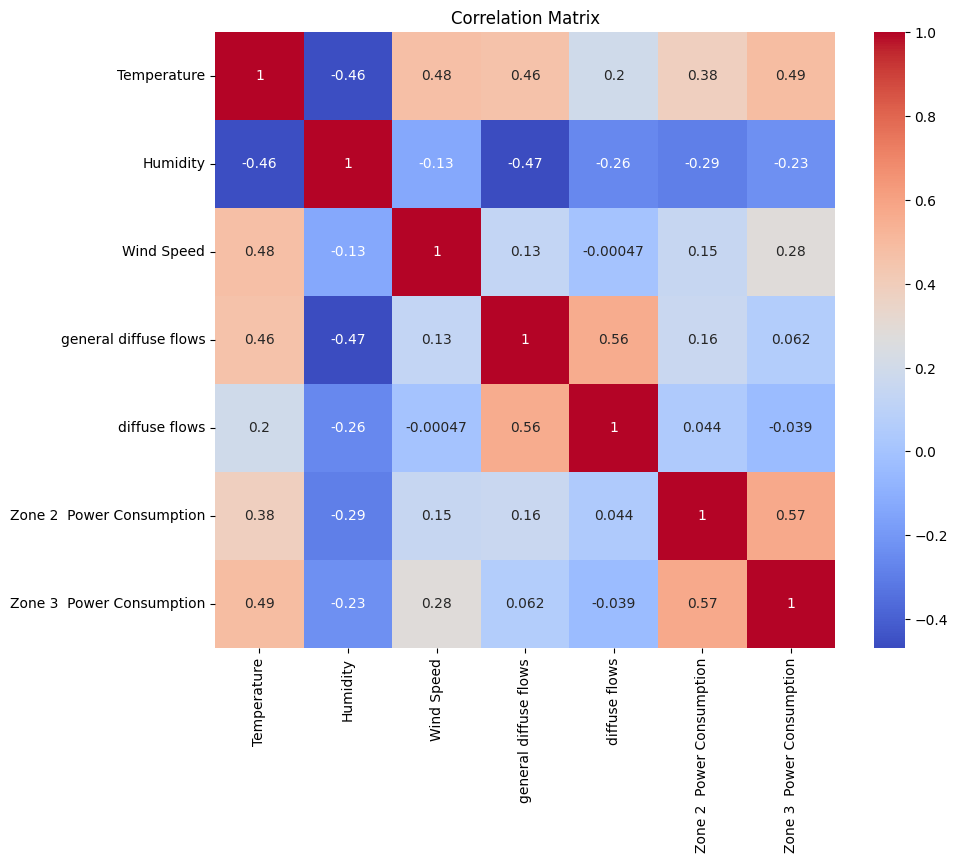

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = X_train.corr()

# Plot heatmap (optional)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Drop features highly correlated with others (e.g., corr > 0.9)
threshold = 0.9
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

# Drop from dataset
X_train_corr = X_train.drop(columns=to_drop)
X_test_corr = X_test.drop(columns=to_drop)


##### 3.8.2  Model-Based Selection (Wrapper or Embedded methods)

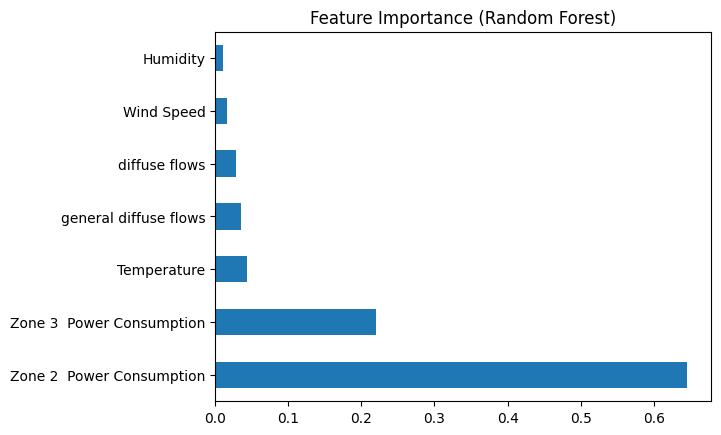

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Fit a model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot(kind='barh')
plt.title("Feature Importance (Random Forest)")
plt.show()

# Select top N features
top_features = importances.sort_values(ascending=False).head(5).index.tolist()
X_train_model = X_train[top_features]
X_test_model = X_test[top_features]

# 4-Model Building (Regression), Evaluation & Tuning

### 4.1 Regression algorithms
    * Linear Regression
    * KNN
    * Decision Trees (CART)
    * Random Forest
    * Boosting
        * Adaboost,
        * Gboost,
        * XGboost
### 4.2 Model Evaluation: Regression metrics: R² & RMSE
1. R-squared (R²) — Coefficient of Determination
    * What it means:
        * Measures how well the model explains the variability in the target variable.
        * Value lies between 0 and 1 (can be negative if model performs worse than the mean).
    * Interpretation:
        * R² = 1 → perfect prediction
        * R² = 0 → model is no better than the average
        * Higher is better
          ![image.png](attachment:e23679fd-3fe1-4ef2-b9e9-1dfed173e585.png)

2. RMSE — Root Mean Squared Error
    * What it means:
        * Measures average prediction error in the same units as the target variable.
        * It gives more weight to larger errors.
    * Interpretation:
        * Lower is better
        * Easy to interpret because it’s in the same unit as
          ![image.png](attachment:65110f95-03fd-4549-be04-631970e6b345.png)
### 4.3 Model Tuning
    * GridSearchCV
    * Hyper Parameter Tuning


In [ ]:
# 📌 Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# 📌 Load the dataset
df = pd.read_csv("Tetuan City power consumption.csv")

# 📌 Select features and target
features = ['Temperature', 'Humidity', 'Wind Speed']
target = 'Zone 1 Power Consumption'

X = df[features]
y = df[target]

# 📌 Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 📌 Define models
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(objective='reg:squarederror')
}

# 📌 Train and evaluate models
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_val_pred = model.predict(X_val_scaled)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2_val = r2_score(y_val, y_val_pred)

    results.append({
        "Model": name,
        "Train RMSE": rmse_train,
        "Train R²": r2_train,
        "Val RMSE": rmse_val,
        "Val R²": r2_val
    })

results_df = pd.DataFrame(results)
display(results_df.sort_values("Val RMSE"))


,Model,Train RMSE,Train R²,Val RMSE,Val R²
3,Random Forest,2048.801907,0.917582,5466.478305,0.408204
6,XGBoost,5115.583625,0.486178,5574.163437,0.384658
5,Gradient Boosting,5958.342331,0.302936,5972.765949,0.293507
1,KNN,4886.710910,0.531127,5994.041510,0.288465
4,AdaBoost,6289.286098,0.223351,6253.605673,0.225506
0,Linear Regression,6368.335523,0.203705,6327.664407,0.207054
2,Decision Tree,133.901608,0.999648,7277.776478,-0.048949
